<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# *Data Science Unit 4 Sprint 2 Assignment 1*

Use TensorFlow Keras & a sample of the [Quickdraw dataset](https://github.com/googlecreativelab/quickdraw-dataset) to build a sketch classification model. The dataset has been sampled to only 10 classes and 10000 observations per class. Please build a baseline classification model then run a few experiments with different optimizers and learning rates. 

*Don't forgot to switch to GPU on Colab!*

## Load Your Data

In [1]:
from google.colab import files
uploaded = files.upload()

Saving quickdraw10.npz to quickdraw10.npz


In [2]:
import numpy as np
import tensorflow as tf 

data = np.load('quickdraw10.npz')
X = data['arr_0']
y = data['arr_1']
print(X.shape)
print(y.shape)

(100000, 784)
(100000,)


In [3]:
class_names = ['apple',
 'anvil',
 'airplane',
 'banana',
 'The Eiffel Tower',
 'The Mona Lisa',
 'The Great Wall of China',
 'alarm clock',
 'ant',
 'asparagus']

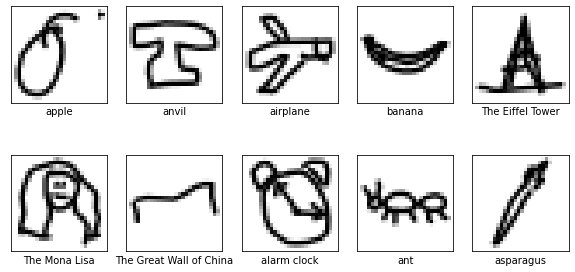

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
start = 0

for num, name in enumerate(class_names):
    plt.subplot(2,5, num+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[start].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(name)
    start += 10000
plt.show()

In [5]:
# Need this line to randomly shuffle both the X & y at the same time.

from sklearn.utils import shuffle
X, y = shuffle(X, y)

In [6]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)


## Build Your Baseline Model
Some Hints:


*  Model should have 784 input values (like mnist)
*  Use `sparse_categorical_crossentropy` as your loss function.
* You need 10 neurons in your last layer for output
* You can add as many hidden layers with as many neurons in them as you like. 
* Limit your model epochs to 30 each time you fit.
* You can use the `validation_split` command to automatically create a training / validation dataset.  Specify a percentage such as .2 in your fit statement. 


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# This is our perceptron from Monday's by-hand: 
model = Sequential()
model.add(Dense(units=323, activation='relu', input_dim=784, name='input_dense_32'))
model.add(Dense(units=323, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [8]:
data

In [12]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_dense_32 (Dense)       (None, 323)               253555    
_________________________________________________________________
dense (Dense)                (None, 323)               104652    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3240      
Total params: 361,447
Trainable params: 361,447
Non-trainable params: 0
_________________________________________________________________


In [13]:
baseline = model.fit(X, y,
                     epochs=30,
                     validation_split=0.2)

Epoch 1/30
2500/2500 [==============================] - 5s 2ms/step - loss: 2.1632 - accuracy: 0.7100 - val_loss: 0.7623 - val_accuracy: 0.7733
Epoch 2/30
2500/2500 [==============================] - 5s 2ms/step - loss: 0.6552 - accuracy: 0.8031 - val_loss: 0.6414 - val_accuracy: 0.8091
Epoch 3/30
2500/2500 [==============================] - 5s 2ms/step - loss: 0.5708 - accuracy: 0.8296 - val_loss: 0.5941 - val_accuracy: 0.8242
Epoch 4/30
2500/2500 [==============================] - 5s 2ms/step - loss: 0.5369 - accuracy: 0.8400 - val_loss: 0.5781 - val_accuracy: 0.8304
Epoch 5/30
2500/2500 [==============================] - 5s 2ms/step - loss: 0.5006 - accuracy: 0.8529 - val_loss: 0.5896 - val_accuracy: 0.8347
Epoch 6/30
2500/2500 [==============================] - 5s 2ms/step - loss: 0.4741 - accuracy: 0.8604 - val_loss: 0.5436 - val_accuracy: 0.8435
Epoch 7/30
2500/2500 [==============================] - 5s 2ms/step - loss: 0.4461 - accuracy: 0.8686 - val_loss: 0.5663 - val_accuracy:

In [16]:
# evaluate the model
scores = model.evaluate(X, y)
print(f"{model.metrics_names[1]}: {scores[1]*100}")

3125/3125 [==============================] - 6s 2ms/step - loss: 0.4028 - accuracy: 0.9064
accuracy: 90.64199924468994


In [17]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


print(X.shape, y.shape)
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# fit the model
model = RandomForestClassifier(random_state=2)
model.fit(X_train, y_train)
# make predictions
yhat = model.predict(X_test)
# evaluate predictions
acc = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % acc)

(100000, 784) (100000,)
(80000, 784) (20000, 784) (80000,) (20000,)
Accuracy: 0.851


In [18]:
y_train[20]

4

In [19]:
X_train[5]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,  49, 131, 189, 116,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,  88, 254, 255, 255,
       254,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  44, 205,
       255, 255, 255,  54,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,  85, 255, 254, 135,   0,   0,   0,   0,   0,   

In [20]:
# X Variable Types
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

In [21]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [22]:
y_train[0:10]

array([1, 9, 7, 7, 2, 3, 4, 1, 4, 6])

In [23]:
print(baseline.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


### Visualize the results

Create charts for both loss and accuracy by epoch. Use line graphs for both charts. Analyze the results. 

At what point should we have stopped training the model and why? 

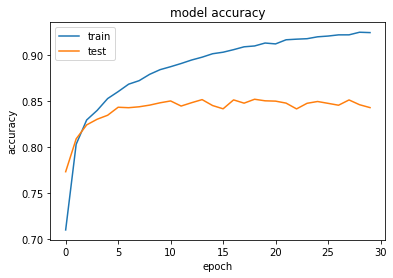

In [24]:
# summarize history for accuracy
plt.plot(baseline.history['accuracy'])
plt.plot(baseline.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#From the plot if accuracy we can see that the model could probably be trained a little more as the trend of accuracy on both datasets is maintaining for the last few epochs.

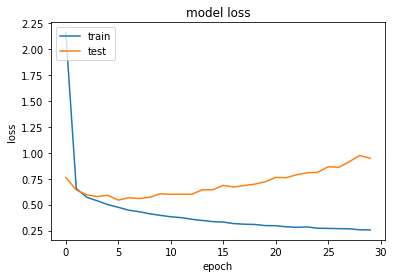

In [25]:
# summarize history for loss
plt.plot(baseline.history['loss'])
plt.plot(baseline.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#From the plot of loss, we can see that the model on train dataset is going down, this might be a sign to stop training at an earlier epoch.

## Change Optimizers
Try using the keras `adam` optimizer instead of `sgd` in your model. Visualize the difference in validation loss between the models with different optimizers. 

In [ ]:

import tensorflow as tf
from tf.keras.optimizers import Adam


adam = Adam()

### Additional Written Tasks:
In this section, you will need to search for resources: 
1. Investigate the various [loss functions](https://www.tensorflow.org/api_docs/python/tf/keras/losses). Which is best suited for the task at hand (predicting 1 / 0) and why? 
2. What is the difference between a loss function and a metric? Why might we need both in Keras? 
3. Investigate the various [optimizers](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers). Stochastic Gradient Descent (`sgd`) is not the learning algorithm dejour anyone. Why is that? What do newer optimizers such as `adam` have to offer? 

## Stretch Goals: 

- Research convolutional neural networks and try including convolution layers in your network.
- Pick two classes and make QuickDraw a binary classification problem, how does your model architecture change?
- Implement Cross Validation model evaluation on your Quickdraw implementation 

Watch some more videos on Gradient Descent:
- [Gradient Descent, Step-by-Step](https://www.youtube.com/watch?v=sDv4f4s2SB8)  by StatQuest w/ Josh Starmer. This will help you understand the gradient descent based optimization that happens underneath the hood of neural networks. It uses a non-neural network example, which I believe is a gentler introduction. You will hear me refer to this technique as "vanilla" gradient descent. 
- [Stochastic Gradient Descent, Clearly Explained!!!](https://www.youtube.com/watch?v=vMh0zPT0tLI) by StatQuest w/ Josh Starmer. This builds on the techniques in the previous video.  This technique is the one that is actually implemented inside modern 'nets. 
- [Siraj Raval the evolution of gradient descent](https://www.youtube.com/watch?v=nhqo0u1a6fw)